In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as smf
from scipy import stats

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import r_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [2]:
df = pd.read_csv("/Users/admin/Downloads/parklane_edited.csv", index_col='timestamp')

In [3]:
# filter where hr or hb is  not 0
df = df[(df['sys_hr'] != 0) | (df['sys_hb'] != 0)]
df = df[(df['h_chwst'] >=5) & (df['h_chwst'] <=20)]
df = df[(df['h_chwrt'] >=5) & (df['h_chwrt'] <=25)]
df = df[(df['pchwp_1_kw'] >=0) & (df['pchwp_1_kw'] <=25)]
#df = df[(df['pchwp_2_kw'] >=0) & (df['pchwp_2_kw'] <=25)]
df = df[(df['h_chwf'] >= 0) & (df['h_chwf'] <= 1500)]
df = df[(df['cwp_1_kw'] >= 0) & (df['cwp_1_kw'] <=25)]
df = df[(df['cwp_2_kw'] >= 0) & (df['cwp_2_kw'] <=25)]
df = df[(df['h_chwf'] >=0) & (df['h_chwf'] <=1500)]
df = df[(df['h_cwst']>=20) & (df['h_cwst']<=32)]
df = df[(df['h_cwrt']>=20) & (df['h_cwrt']<=40)]
df = df[(df['ch_1_kwe']>=0) & (df['ch_1_kwe']<=350)]
df = df[(df['ch_2_kwe']>=0) & (df['ch_2_kwe']<=350)]
df = df[(df['ct_1_kw']>=0) & (df['ct_1_kw']<=15)]
df = df[(df['ct_2_kw']>=0) & (df['ct_2_kw']<=15)]
df = df[(df['sys_cl']>=0) & (df['sys_cl']<=600)]
df = df[(df['sys_hr']>=0) & (df['sys_hr']<=1000)]
df = df[(df['sys_kw']>=0) & (df['sys_kw']<=400)]
fil_df = df[(df['ch_sysef']>=0.3) & (df['ch_sysef']<=0.8)]

# replace NaN values with 0? median imputation
fil_df = fil_df.fillna(fil_df.median())

fil_df

,sys_kw,sys_cl,sys_hr,sys_hb,sys_eff,ch_sysef,air_eff,h_chwst,h_chwrt,h_cwst,...,ahu_ilp_1_ph,ahu_ilp_1_mvp,ahu_ilp_1_fl,ahu_ilp_1_freq,ahu_ilp_1_rpm,ahu_ilp_2_ph,ahu_ilp_2_mvp,ahu_ilp_2_fl,ahu_ilp_2_freq,ahu_ilp_2_rpm
timestamp,,,,,,,,,,,,,,,,,,,,,
12/3/23 10:35,49.378506,127.538132,142.273010,-7.788623,0.760313,0.387167,0.374602,19.742857,21.591053,25.541592,...,5.25,27.560001,119.240005,26.162006,2589.0,4.940001,27.560001,129.360001,26.121365,2572.0
12/3/23 10:36,47.122364,152.515945,131.309479,22.068899,0.622407,0.308619,0.312583,19.432108,21.825630,25.705078,...,5.25,27.560001,119.680016,26.141687,2579.0,5.020000,27.560001,127.160011,26.355047,2577.0
12/3/23 10:37,49.685364,126.885735,129.005188,6.926045,0.765892,0.391576,0.375121,19.530668,21.554024,25.770800,...,5.25,27.560001,118.800011,26.162006,2575.0,4.940001,27.560001,129.800003,26.487127,2607.0
12/3/23 10:38,59.431534,107.953125,152.230637,-23.163383,0.995130,0.550531,0.441349,19.569000,21.200394,25.735838,...,5.25,27.560001,120.560013,26.355047,2582.0,5.020000,27.560001,127.160011,26.294086,2577.0
12/3/23 10:39,72.180534,155.478806,186.238052,-9.468945,0.779194,0.467190,0.308480,18.833967,21.018211,25.691097,...,5.33,27.560001,117.920013,26.314405,2590.0,5.020000,27.560001,127.600006,26.233126,2611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23/3/23 20:06,137.081909,247.396896,284.478455,-0.773916,0.736255,0.554524,0.182317,7.818447,13.697515,27.472160,...,4.40,27.560001,146.960007,26.283924,2582.0,2.320000,27.560001,78.760002,17.332964,1705.0
23/3/23 20:07,135.959839,248.291168,281.295349,-0.054138,0.726881,0.545478,0.181335,7.824304,13.687803,27.433922,...,4.32,27.560001,149.600006,26.111206,2588.0,2.320000,27.560001,80.080002,17.414244,1709.0
23/3/23 20:08,135.941391,244.448059,279.352264,-0.729824,0.737689,0.554409,0.184331,7.847722,13.676705,27.421177,...,4.40,27.560001,147.840012,26.212807,2580.0,2.320000,27.560001,80.080002,17.302483,1703.0


# Feature Extraction

In [4]:
chiller_feats = ["sys_hb", "h_chwst", "h_chwrt", "h_cwst", "h_cwrt", "h_chwf", "h_cwf", "pchwp_1_kw", "pchwp_2_kw", "cwp_1_kw", "cwp_2_kw", "ct_1_kw", "ct_2_kw", "sys_cl", "sys_hr", "sys_kw"]
df_chiller = fil_df[chiller_feats]
X = df_chiller
y = fil_df[["ch_sysef"]]

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

## Pearsons Correlation

In [5]:
corr_values = r_regression(X,y)

table_df = pd.DataFrame(
    data=corr_values.reshape(1, -1),
    columns=chiller_feats)
table_df

/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sys_hb,h_chwst,h_chwrt,h_cwst,h_cwrt,h_chwf,h_cwf,pchwp_1_kw,pchwp_2_kw,cwp_1_kw,cwp_2_kw,ct_1_kw,ct_2_kw,sys_cl,sys_hr,sys_kw
0,0.000283,-0.109361,-0.176764,0.681242,0.676266,0.434176,0.431685,0.438035,0.436892,0.457951,0.516526,0.661123,0.654419,0.495514,0.533481,0.704458


## Spearmans Correlation

In [6]:
# spearmans correlation
res_corr = []
for feat in chiller_feats:
    res = stats.spearmanr(fil_df[feat], y)
    res_corr.append(res.statistic)

res_corr = np.array(res_corr)
table_df = pd.DataFrame(
    data=res_corr.reshape(1, -1),
    columns=chiller_feats
)
table_df


,sys_hb,h_chwst,h_chwrt,h_cwst,h_cwrt,h_chwf,h_cwf,pchwp_1_kw,pchwp_2_kw,cwp_1_kw,cwp_2_kw,ct_1_kw,ct_2_kw,sys_cl,sys_hr,sys_kw
0,-0.053126,0.17525,-0.083094,0.743314,0.743014,0.481124,0.538504,0.525164,0.489442,0.54863,0.561878,0.597843,0.56257,0.566528,0.596591,0.721065


comment
the last 5 features are the most significant contributor to chiller efficiency
which are cooling tower power inputs, cooling load, heat rejection, power input, normalization isn't necessary for pearson's test

## PCA

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

n_list = [i for i in range(1,11)]
r_squared = {}

for n in n_list:
    pca_n = make_pipeline(PCA(n_components = n), LinearRegression())
    pca_n.fit(X_train, y_train)

    r_squared_value = pca_n.score(X_test, y_test)
    r_squared[n] =  r_squared_value


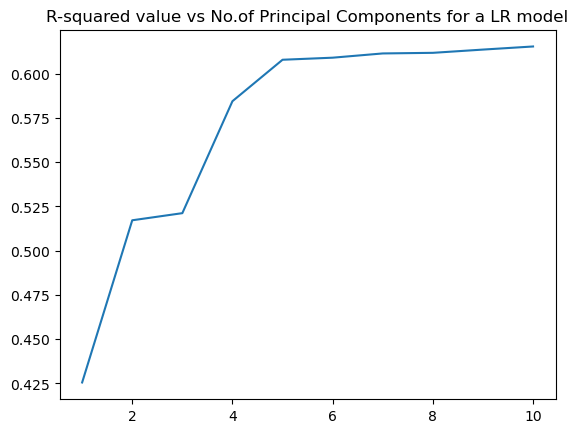

In [8]:
n = r_squared.keys()
values = r_squared.values()
plt.plot(n,values)
plt.title("R-squared value vs No.of Principal Components for a LR model")
plt.show()

In [9]:
pd.set_option('mode.use_inf_as_na', True)


/var/folders/zj/qh6k8b392r109tcjhtspn0lh0000gp/T/ipykernel_6245/1991739887.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [10]:
five_feat_df = fil_df[["ct_1_kw", "ct_2_kw", "h_cwf", "h_cwrt", "h_chwst", "ch_sysef"]]
five_feat_df = five_feat_df.reset_index(drop=True)

five_feat_df.corr()

In [11]:
fil_df[chiller_feats].corr()

,sys_hb,h_chwst,h_chwrt,h_cwst,h_cwrt,h_chwf,h_cwf,pchwp_1_kw,pchwp_2_kw,cwp_1_kw,cwp_2_kw,ct_1_kw,ct_2_kw,sys_cl,sys_hr,sys_kw
sys_hb,1.000000,-0.015550,-0.014414,-0.000058,-0.000648,-0.007584,-0.015368,-0.010980,0.001568,-0.011123,0.002438,-0.003128,-0.005510,0.002003,-0.010369,-0.000192
h_chwst,-0.015550,1.000000,0.914104,0.002645,0.064066,0.502202,0.085185,0.293781,0.108015,0.096578,0.051519,0.052070,0.054154,0.140063,0.145266,0.091945
h_chwrt,-0.014414,0.914104,1.000000,-0.058744,0.030827,0.332439,0.039091,0.199159,0.038846,0.047629,-0.024256,-0.067701,-0.065797,0.118657,0.129345,0.050685
h_cwst,-0.000058,0.002645,-0.058744,1.000000,0.937129,0.588329,0.592009,0.487125,0.549323,0.595747,0.573758,0.565290,0.546327,0.670165,0.670053,0.747761
h_cwrt,-0.000648,0.064066,0.030827,0.937129,1.000000,0.699121,0.591718,0.519000,0.606200,0.599819,0.616421,0.597139,0.580858,0.806917,0.817176,0.860801
h_chwf,-0.007584,0.502202,0.332439,0.588329,0.699121,1.000000,0.752446,0.551781,0.655129,0.753627,0.608663,0.539343,0.533238,0.867383,0.856643,0.843006
h_cwf,-0.015368,0.085185,0.039091,0.592009,0.591718,0.752446,1.000000,0.419762,0.620098,0.979911,0.576091,0.411626,0.405896,0.854214,0.852933,0.818859
pchwp_1_kw,-0.010980,0.293781,0.199159,0.487125,0.519000,0.551781,0.419762,1.000000,0.359119,0.481665,0.371562,0.485042,0.481571,0.488524,0.501983,0.537084
pchwp_2_kw,0.001568,0.108015,0.038846,0.549323,0.606200,0.655129,0.620098,0.359119,1.000000,0.606890,0.658846,0.496878,0.488358,0.691828,0.679638,0.696150
cwp_1_kw,-0.011123,0.096578,0.047629,0.595747,0.599819,0.753627,0.979911,0.481665,0.606890,1.000000,0.571601,0.435186,0.428311,0.850152,0.850162,0.825369


<Axes: >

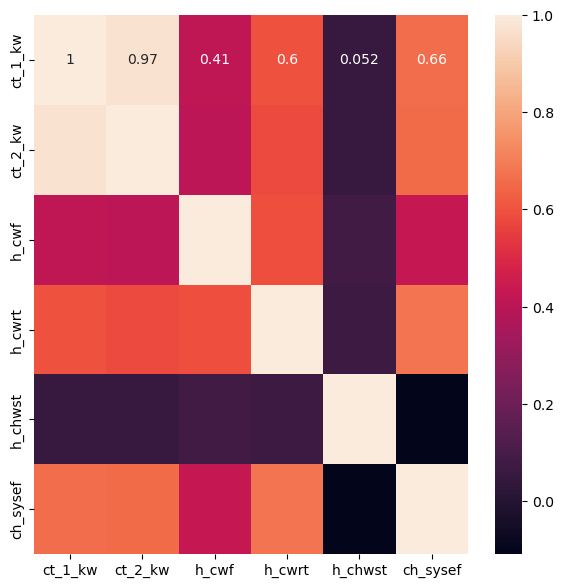

In [12]:
plt.figure(figsize=(7, 7))
sns.heatmap(five_feat_df.corr(), annot=True)

In [13]:
# sns.pairplot(five_feat_df)
# picture in msTeams
fil_df["total_ct_kw"] = fil_df["ct_1_kw"] + fil_df["ct_2_kw"]
fil_df["total_ct_kw"]

/var/folders/zj/qh6k8b392r109tcjhtspn0lh0000gp/T/ipykernel_6245/441744375.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fil_df["total_ct_kw"] = fil_df["ct_1_kw"] + fil_df["ct_2_kw"]


timestamp
12/3/23 10:35    3.508719
12/3/23 10:36    3.477781
12/3/23 10:37    7.184000
12/3/23 10:38    7.088001
12/3/23 10:39    7.152000
                   ...   
23/3/23 20:06    6.928000
23/3/23 20:07    6.944000
23/3/23 20:08    6.960000
23/3/23 20:09    6.960000
23/3/23 20:10    6.960000
Name: total_ct_kw, Length: 91955, dtype: float64

In [14]:
# Train Test Split
five_Feat = fil_df[["total_ct_kw", "h_cwf", "h_cwrt", "h_chwst"]] # due to multicollinearity, ct_2_kw is removed
y = fil_df[["ch_sysef"]]

/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

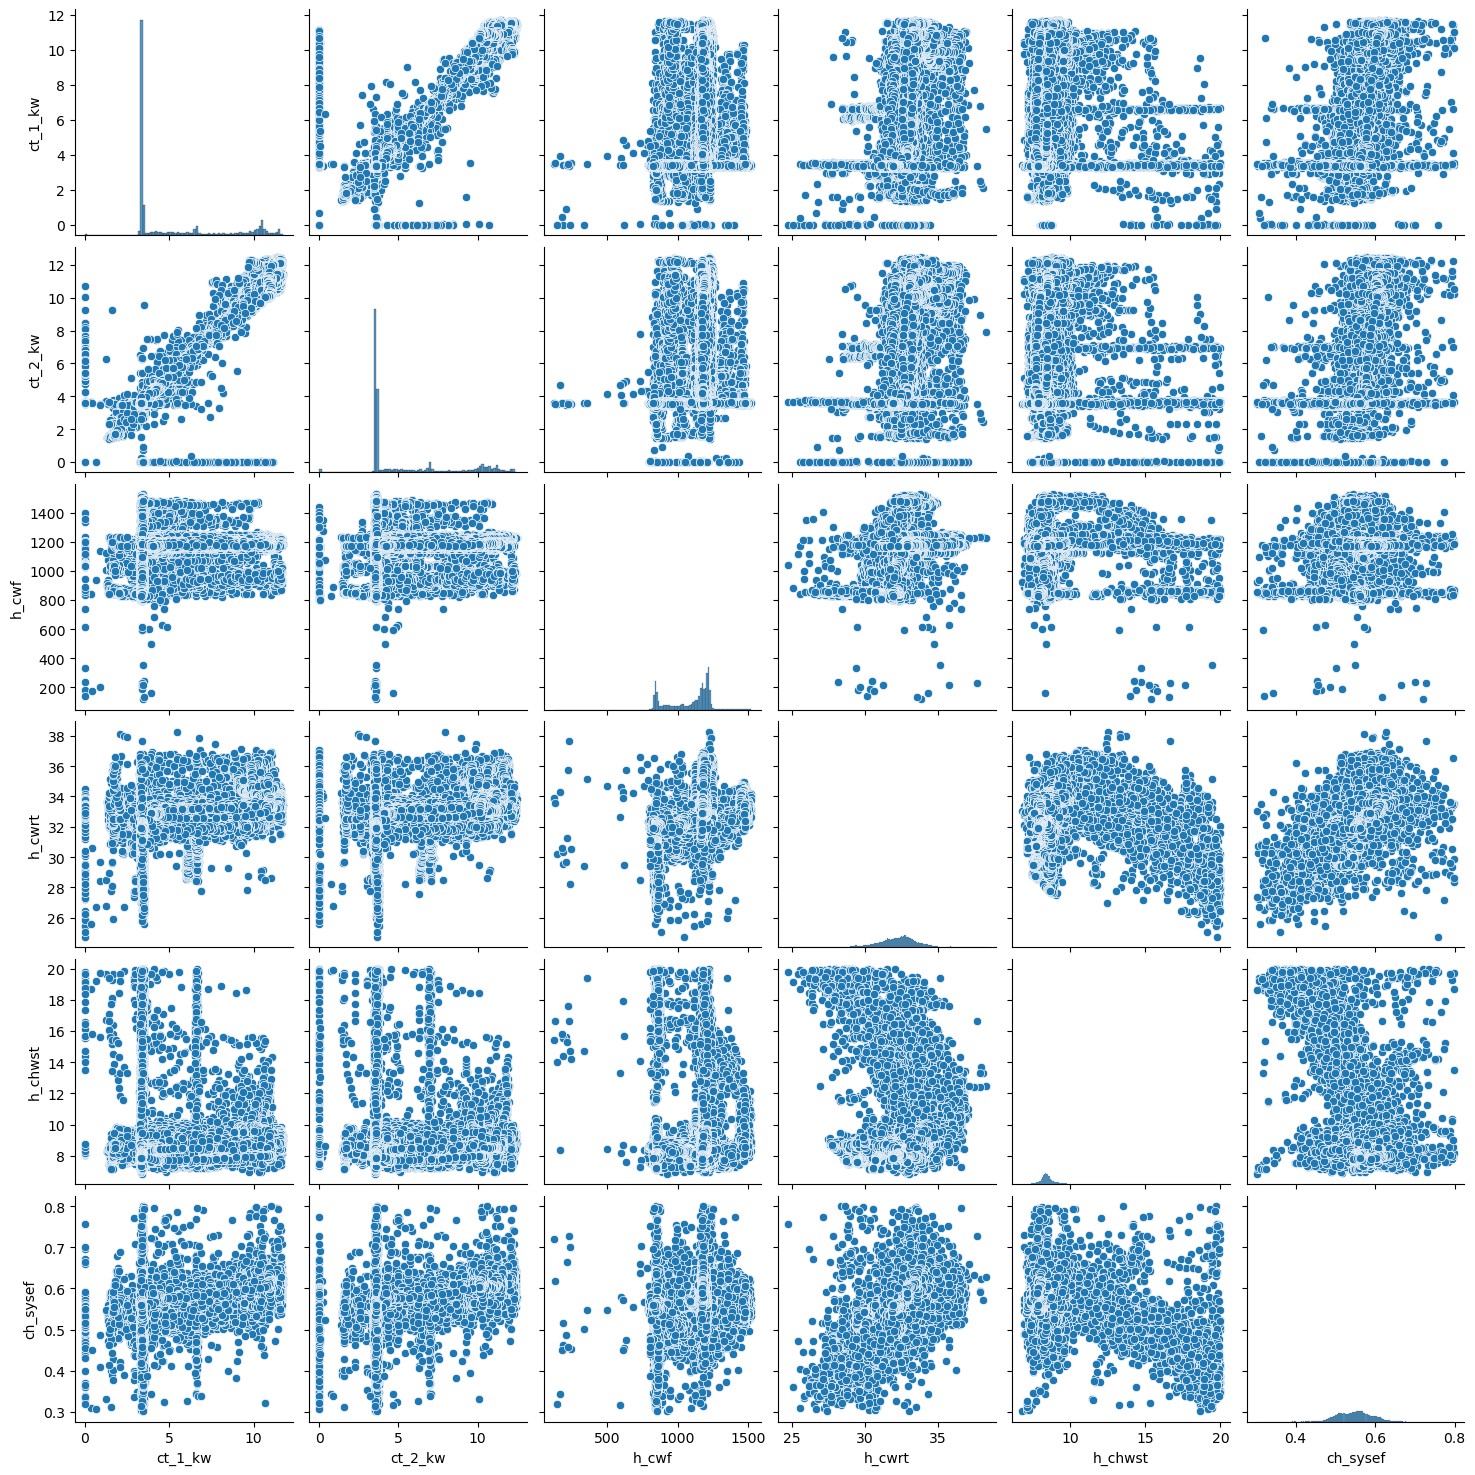

In [15]:
sns.pairplot(five_feat_df)

# Polynomial Regression

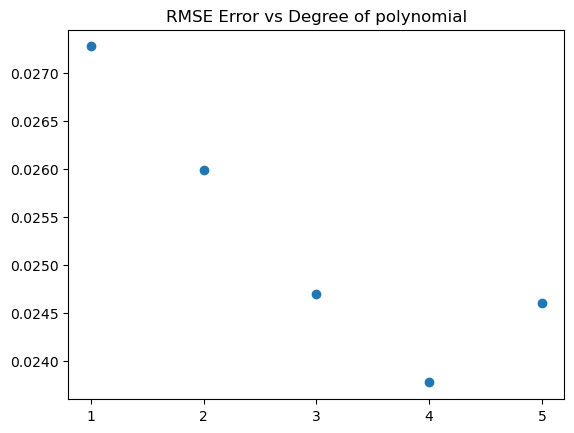

In [16]:
degrees = [i for i in range(1, 6)]
rmse = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(five_Feat)
    five_Feat_train, five_Feat_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

    poly_reg = LinearRegression()
    poly_reg.fit(five_Feat_train, y_train)

    poly_reg_y_predicted = poly_reg.predict(five_Feat_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted)))


plt.scatter(degrees, rmse)
plt.title("RMSE Error vs Degree of polynomial")
plt.xticks(degrees)
plt.show()



In [17]:
# comparison with ordinary LinReg
lin_reg = LinearRegression()
lin_reg.fit(five_Feat_train, y_train)
lin_reg_y_predicted = lin_reg.predict(five_Feat_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
print("RMSE error for ordinary Linear Regression is {}".format(lin_reg_rmse))

RMSE error for ordinary Linear Regression is 0.024597527209308245


polynomial regression with degree of 1 actually produces lower MSE

# Ridge Regression

/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.00988e-38): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.0805e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.02175e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/kaer/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.71084e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/kaer/lib/pyth

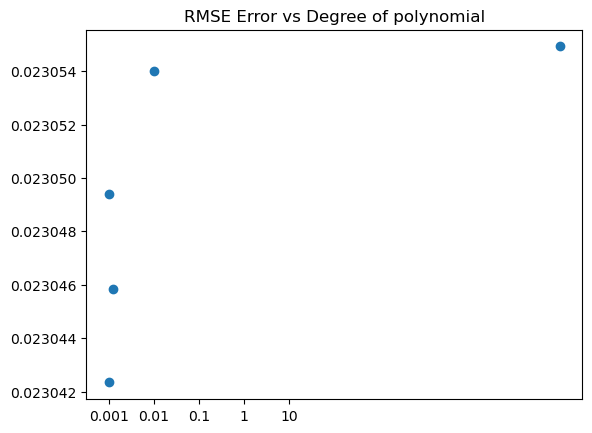

In [18]:
alphas = [0.001, 0.01, 0.1, 1, 10]
rmse = []
for alpha in alphas:
    ridgeReg = Ridge(alpha=alpha)

    ridgeReg.fit(five_Feat_train, y_train)

    ridge_reg_y_predicted = ridgeReg.predict(five_Feat_test)
    ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, ridge_reg_y_predicted))
    
    rmse.append(ridge_reg_rmse)
plt.scatter(alphas, rmse)
plt.title("RMSE Error vs Degree of polynomial")
plt.xticks(range(len(alphas)), alphas)
plt.show()